# Data Preprocessing and Feature Engineering
You should build a machine learning pipeline with data preprocessing and feature engineering steps. In particular, you should do the following:
- Load the `adult` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data preprocessing and feature engineering by
    - handling the implicit missing values of attributes, e.g., removing them using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html);
    - transforming features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), which requires encoding categorical attributes using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and scaling features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html);
    - reducing the dimensionality of the dataset if needed using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html);
    - and handling imbalanced classes if needed using [Imbalanced-Learn](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Evaluate the impact of the data preprocessing and feature engineering techniques on the effectiveness and efficiency of the model.
- Check the documentation to identify the most important hyperparameters, attributes, and methods. Use them in practice.

In [16]:
import pandas as pd
import sklearn.model_selection as sms
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/adult.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
data_train, data_test = sms.train_test_split(data)
print(data.shape)
print(data_train.shape)
print(data_test.shape)

(32561, 15)
(24420, 15)
(8141, 15)


In [15]:
data_train.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


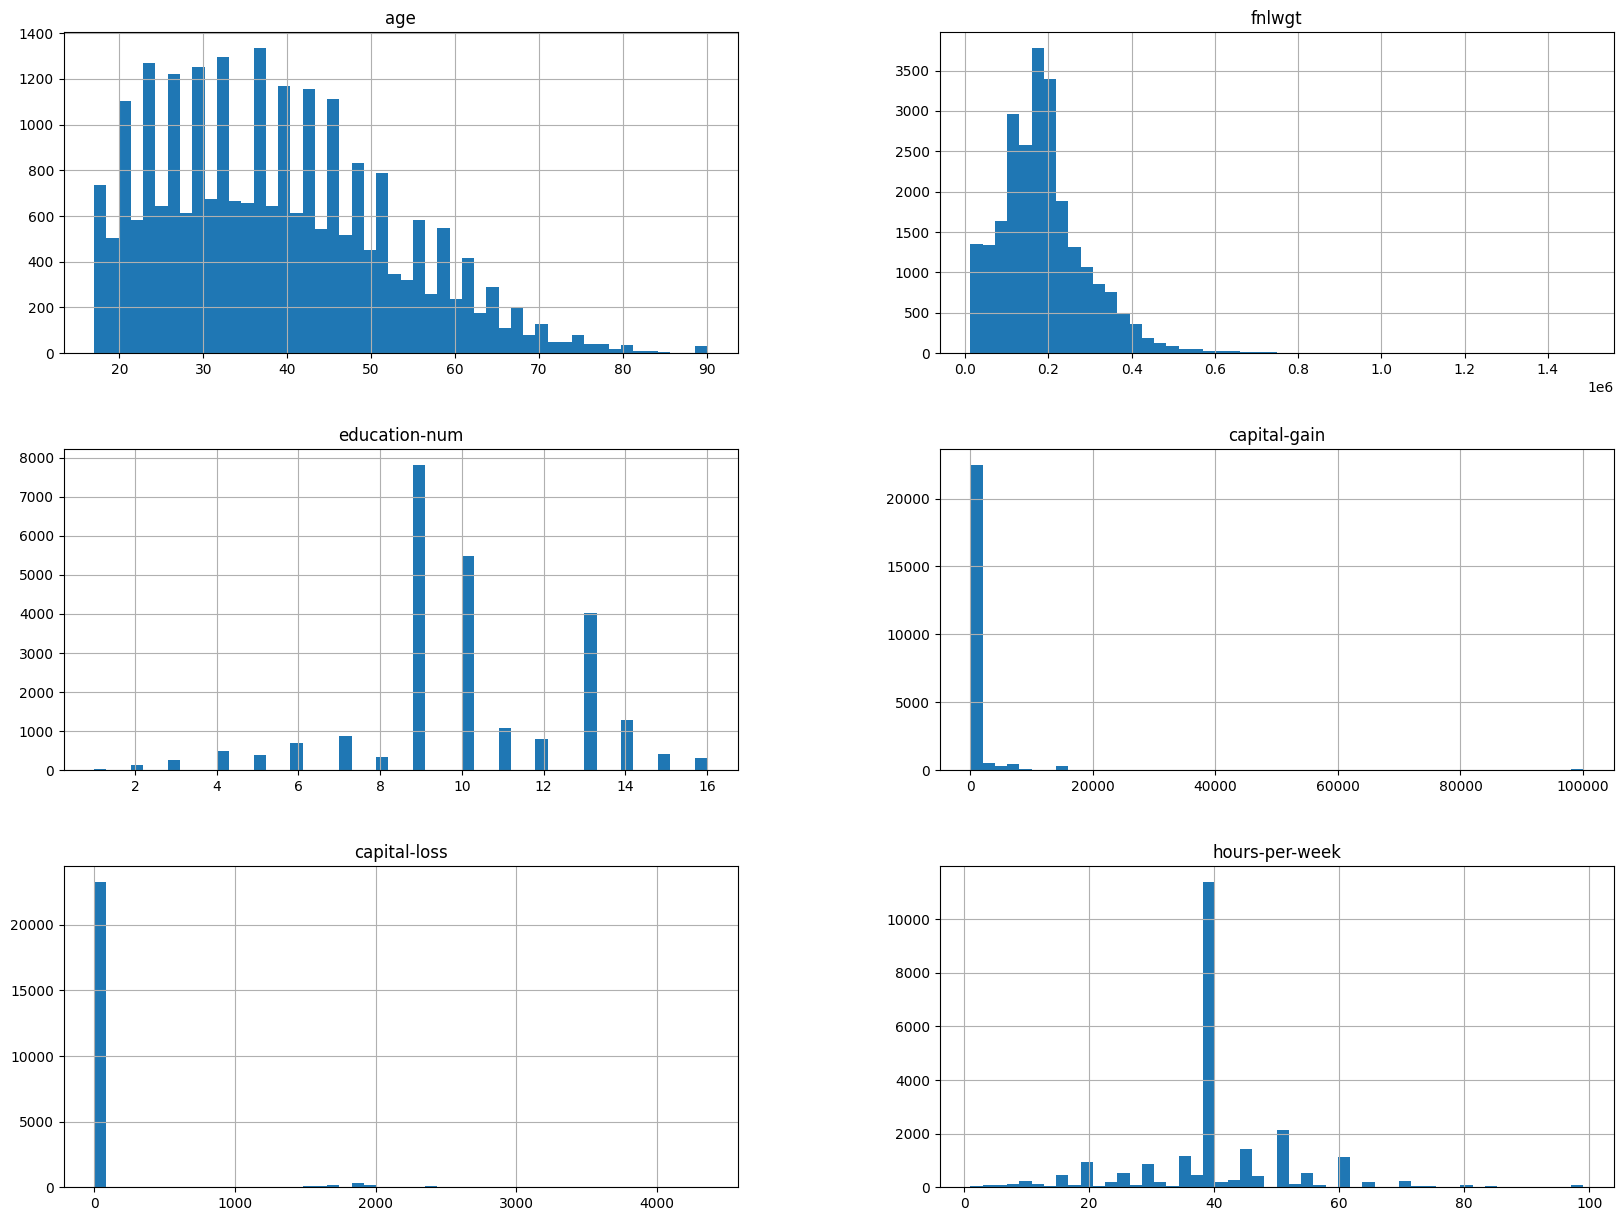

In [22]:
numerical_data = data_train.select_dtypes(include=['number'])

numerical_data.hist(bins=50, figsize=(20, 15))
plt.show()

In [35]:
print(data_train["workclass"].value_counts())
print("______________________________________________")
print(data_train["education"].value_counts())
print("______________________________________________")
print(data_train["marital-status"].value_counts())
print("______________________________________________")
print(data_train["occupation"].value_counts())
print("______________________________________________")
print(data_train["relationship"].value_counts())
print("______________________________________________")
print(data_train["race"].value_counts())
print("______________________________________________")
print(data_train["sex"].value_counts())
print("______________________________________________")
print(data_train["native-country"].value_counts())
print("______________________________________________")
print(data_train["target"].value_counts())

workclass
Private             17021
Self-emp-not-inc     1912
Local-gov            1567
?                    1386
State-gov             963
Self-emp-inc          836
Federal-gov           717
Without-pay            13
Never-worked            5
Name: count, dtype: int64
______________________________________________
education
HS-grad         7821
Some-college    5483
Bachelors       4021
Masters         1280
Assoc-voc       1069
11th             888
Assoc-acdm       793
10th             704
7th-8th          499
Prof-school      421
9th              389
12th             331
Doctorate        304
5th-6th          253
1st-4th          123
Preschool         41
Name: count, dtype: int64
______________________________________________
marital-status
Married-civ-spouse       11185
Never-married             8034
Divorced                  3371
Widowed                    755
Separated                  751
Married-spouse-absent      310
Married-AF-spouse           14
Name: count, dtype: int64
______

In [38]:
data_train = data_train.replace(" ?", pd.NA)
data_test = data_test.replace(" ?", pd.NA)

data_train = data_train.dropna()
data_test = data_test.dropna()

print(data_train.shape)
print(data_test.shape)

(22626, 15)
(7536, 15)


In [41]:
x_train = data_train.drop("target", axis=1)
y_train = data_train["target"]

x_test = data_test.drop("target", axis=1)
y_test = data_test["target"]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22626, 14)
(7536, 14)
(22626,)
(7536,)


In [43]:
categorical_attributes = x_train.select_dtypes(include=['object']).columns
numerical_attributes = x_train.select_dtypes(include=['number']).columns